In [383]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # to print multiple outputs from the same cell
import math
import utils
import pandas as pd
from datetime import datetime, timedelta, date

### Let's load the merged dataframe

In [384]:
merged_df = pd.read_csv('dataset/merged_dataset_cleaned.csv', lineterminator='\n')
merged_df

,user_id,name,lang,bot,account_created,statuses_count,tweet_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created,text
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,486718663223828480,0,0,0,0,0,1,2019-07-11 03:49:06,"@4fri2endly0 ""A business that makes nothing bu..."
1,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,479535357126393856,0,0,0,0,0,0,2019-06-21 08:05:13,"""Happiness is not a station you arrive at, but..."
2,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,451700895491706880,0,0,0,0,0,0,2019-04-05 12:41:00,Music flow.
3,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,491920040405397504,0,0,0,0,0,1,2019-07-25 12:17:31,@_SimplyKC follow meeee...
4,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,460522543628046336,0,0,0,0,0,0,2019-04-29 20:55:05,"""You are the only person on earth who can use ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10460631,933183398,Corvanna,en,0,2017-11-09 23:24:16,5279,591409992605028352,1,0,0,0,0,1,2020-04-25 01:15:04,RT @_MarcussA: Phone dry
10460632,933183398,Corvanna,en,0,2017-11-09 23:24:16,5279,570728918614974464,0,0,0,0,0,0,2020-02-27 23:35:52,@_Freak_x1
10460633,933183398,Corvanna,en,0,2017-11-09 23:24:16,5279,582259121648320512,1,0,0,0,0,0,2020-03-30 19:12:47,Something wrong
10460634,933183398,Corvanna,en,0,2017-11-09 23:24:16,5279,591238256626380800,0,0,0,0,0,0,2020-04-24 13:52:39,always going over my data


### Filter tweets only of 2019

In [385]:
# Cast tweet creation to datetime
merged_df["tweet_created"] = pd.to_datetime(merged_df["tweet_created"], errors="coerce")

year = 2019

merged_df = merged_df[merged_df.tweet_created.dt.year == year]
merged_df

,user_id,name,lang,bot,account_created,statuses_count,tweet_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created,text
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,486718663223828480,0,0,0,0,0,1,2019-07-11 03:49:06,"@4fri2endly0 ""A business that makes nothing bu..."
1,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,479535357126393856,0,0,0,0,0,0,2019-06-21 08:05:13,"""Happiness is not a station you arrive at, but..."
2,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,451700895491706880,0,0,0,0,0,0,2019-04-05 12:41:00,Music flow.
3,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,491920040405397504,0,0,0,0,0,1,2019-07-25 12:17:31,@_SimplyKC follow meeee...
4,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,460522543628046336,0,0,0,0,0,0,2019-04-29 20:55:05,"""You are the only person on earth who can use ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457174,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42,460078189067239424,0,0,0,0,0,0,2019-04-28 15:29:22,make up money could be going to so many other ...
10457175,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42,461515583813476352,1,0,1,0,0,1,2019-05-02 14:41:04,@dilligaf_life !
10457176,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42,982032609,0,0,0,0,0,0,2019-07-12 21:47:31,"@LottoRackz478 ""What we have learned from othe..."
10457177,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42,459627644548440064,0,0,0,0,0,0,2019-04-27 09:39:04,I Thank God Everyday. I Know Where I Could've ...


As we can see there are ~= 5000000 tweets made in 2019 in the dataset

### Group by user, tweet creation in the same day and collapse the values (sum)

In [386]:
temp_df = merged_df.groupby(['user_id',merged_df['tweet_created'].dt.to_period('D')], as_index=False).sum(['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions'])
temp_df = temp_df[['user_id', 'bot', 'retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']]
temp_df['AcceptanceScore'] = temp_df['retweet_count'] + temp_df['reply_count'] + temp_df['favorite_count']
temp_df['DiffusionScore'] = temp_df['num_hashtags'] + temp_df['num_urls'] + temp_df['num_mentions']
temp_df['SuccessScore'] = temp_df['AcceptanceScore']/ (temp_df['DiffusionScore'] + 0.1)
temp_df['bot'].mask(temp_df['bot']>0, 1, inplace=True)
temp_df = temp_df[['user_id', 'bot', 'SuccessScore']]


temp_tmp = merged_df.groupby(['user_id',merged_df['tweet_created'].dt.to_period('D')], as_index=False).size()
temp_df['tweet_created'] = temp_tmp['tweet_created'].astype(str)
temp_df['tweet_created'] = pd.to_datetime(temp_df['tweet_created'], errors='coerce')
final_df = temp_df
final_df

,user_id,bot,SuccessScore,tweet_created
0,722623,0,1.549296,2019-01-03
1,722623,0,1626.393443,2019-01-04
2,722623,0,1.818182,2019-01-05
3,722623,0,0.322581,2019-01-06
4,722623,0,11.526718,2019-01-07
...,...,...,...,...
512275,2722021425,0,4.545455,2019-07-28
512276,2722021425,0,3.636364,2019-07-29
512277,2722021425,0,1.463415,2019-07-30
512278,2722021425,0,2683.636364,2019-07-31


### Create a list of DataFrames. This represents the timeseries for each user. Add the missing days to each user

In [387]:
import numpy as np
users = temp_df.groupby('user_id', as_index=False)['bot'].sum()
users['bot'].mask(users['bot']>0, 1, inplace=True)
from tslearn.preprocessing import TimeSeriesResampler
scaler = TimeSeriesResampler(sz=365)  
USERS_TIMESSERIES_LIST = {}
start_date = date(2019, 1, 1)
end_date = date(2019, 12, 1)

for user in users.user_id:

    USERS_TIMESSERIES_LIST[user] = final_df[final_df.user_id == user][['SuccessScore', 'tweet_created']]
    
    new_date_range = pd.date_range(start="2019-01-01", end="2019-12-31", freq="D")
    USERS_TIMESSERIES_LIST[user] = USERS_TIMESSERIES_LIST[user].set_index('tweet_created')
    # USERS_TIMESSERIES_LIST[user] = pd.Series(USERS_TIMESSERIES_LIST[user].squeeze())
    USERS_TIMESSERIES_LIST[user] = USERS_TIMESSERIES_LIST[user].reindex(new_date_range, fill_value=-1)
    USERS_TIMESSERIES_LIST[user].index.name = 'day'
    USERS_TIMESSERIES_LIST[user].reset_index(inplace=True)
    USERS_TIMESSERIES_LIST[user].drop(columns='day', inplace=True)
    USERS_TIMESSERIES_LIST[user] = USERS_TIMESSERIES_LIST[user].SuccessScore.array


## Time Series Transformations

In [388]:
import numpy as np
df = pd.DataFrame()
df['user_id'] = list(USERS_TIMESSERIES_LIST.keys())
df['dim_0'] = np.array(USERS_TIMESSERIES_LIST.values())
df = pd.merge(df, users, on = 'user_id')
df = df.drop(columns='user_id')
df

,dim_0,bot
0,"[-1.0, -1.0, 1.5492957746478875, 1626.39344262...",0
1,"[-1.0, -1.0, 0.0, 0.0, 0.0, 0.1639344262295082...",0
2,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",0
3,"[-1.0, -1.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0...",0
4,"[-1.0, -1.0, 60.094007050528795, 0.44806517311...",0
...,...,...
6575,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",0
6576,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",0
6577,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",0
6578,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",0


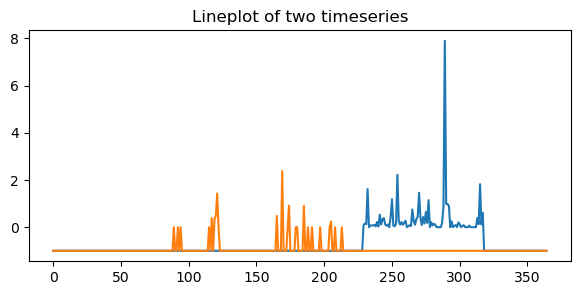

In [389]:
import matplotlib.pyplot as plt
import random

ts1Index = random.randint(0, (len(df)/2)-1)
ts2Index = random.randint(len(df)/2, len(df)-1)


ts1 = df.dim_0.iloc[ts1Index]
ts2 = df.dim_0.iloc[ts2Index]

fig, ax1 = plt.subplots(figsize = (7, 3))

ax1.set_title('Lineplot of two timeseries')
ax1.plot(ts1)
ax1.plot(ts2)
plt.show();

### Offset Translation

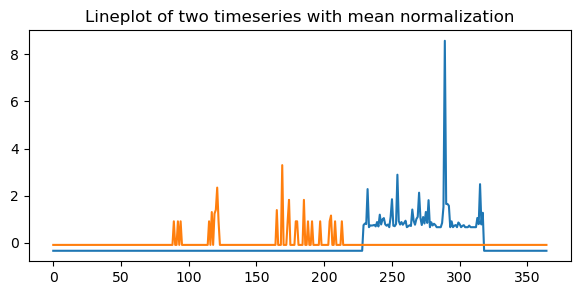

In [390]:
fig2, ax2 = plt.subplots(figsize = (7, 3))

ts1Mean = ts1 - ts1.mean()
ts2Mean = ts2 - ts2.mean()

ax2.set_title('Lineplot of two timeseries with mean normalization')
ax2.plot(ts1Mean)
ax2.plot(ts2Mean)
plt.show();

### Amplitude Scaling

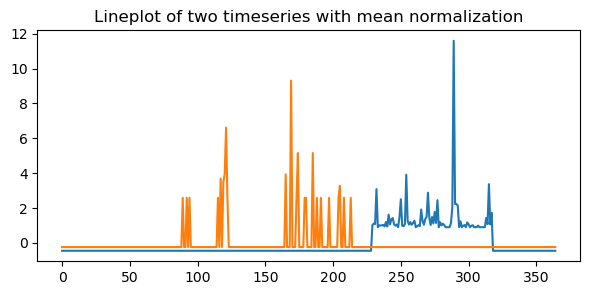

In [391]:
fig3, ax3 = plt.subplots(figsize = (7, 3))

ts1Norm = (ts1 - ts1.mean())/ts1.std()
ts2Norm = (ts2 - ts2.mean())/ts2.std()

ax3.set_title('Lineplot of two timeseries with mean normalization')
ax3.plot(ts1Norm)
ax3.plot(ts2Norm)
plt.show();

### Linear Trending

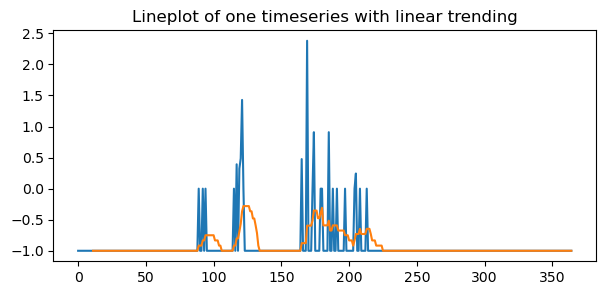

In [392]:
fig4, ax4 = plt.subplots(figsize = (7, 3))

ax4.set_title('Lineplot of one timeseries with linear trending')
ax4.plot(ts2)
ax4.plot(pd.Series(ts2).rolling(window=12).mean())
plt.show();

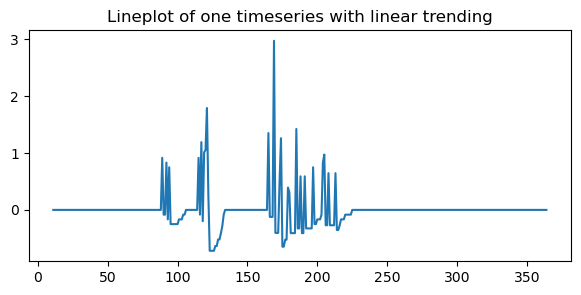

In [393]:
fig5, ax5 = plt.subplots(figsize = (7, 3))
ts2Linear = ts2 - pd.Series(ts2).rolling(window=12).mean()

ax5.set_title('Lineplot of one timeseries with linear trending')
ax5.plot(ts2Linear)
plt.show();

### Noise remove

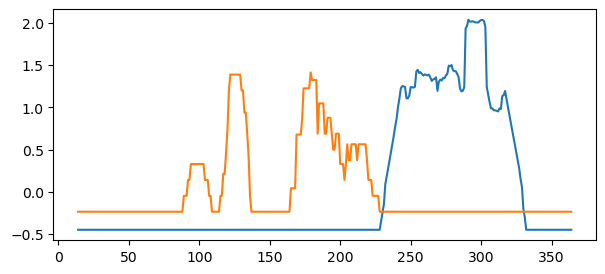

In [394]:
fig6, ax6 = plt.subplots(figsize = (7, 3))

w = 15
ts1NoNoise = pd.Series(ts1Norm).rolling(window=w).mean()
ts2NoNoise = pd.Series(ts2Norm).rolling(window=w).mean()


ax6.plot(ts1NoNoise)
ax6.plot(ts2NoNoise)
plt.show();

In [395]:
users = temp_df.groupby('user_id', as_index=False)['bot'].sum()
users['bot'].mask(users['bot']>0, 1, inplace=True)
from tslearn.preprocessing import TimeSeriesResampler
scaler = TimeSeriesResampler(sz=365)  
USERS_TIMESSERIES_LIST = {}
start_date = date(2019, 1, 1)
end_date = date(2019, 12, 1)

for user in users.user_id:

    USERS_TIMESSERIES_LIST[user] = final_df[final_df.user_id == user][['SuccessScore', 'tweet_created']]
    
    new_date_range = pd.date_range(start="2019-01-01", end="2019-12-31", freq="D")
    USERS_TIMESSERIES_LIST[user] = USERS_TIMESSERIES_LIST[user].set_index('tweet_created')
    USERS_TIMESSERIES_LIST[user] = USERS_TIMESSERIES_LIST[user].reindex(new_date_range, fill_value=-1)
    USERS_TIMESSERIES_LIST[user].index.name = 'day'
    USERS_TIMESSERIES_LIST[user].reset_index(inplace=True)
    USERS_TIMESSERIES_LIST[user].drop(columns='day', inplace=True)
    USERS_TIMESSERIES_LIST[user] = USERS_TIMESSERIES_LIST[user].SuccessScore
    USERS_TIMESSERIES_LIST[user] = ((USERS_TIMESSERIES_LIST[user] - USERS_TIMESSERIES_LIST[user].mean())/USERS_TIMESSERIES_LIST[user].std()) # Normalize
    USERS_TIMESSERIES_LIST[user] = USERS_TIMESSERIES_LIST[user] - pd.Series(USERS_TIMESSERIES_LIST[user]).rolling(window=15).mean() # Noise Removal
    USERS_TIMESSERIES_LIST[user] = pd.Series(USERS_TIMESSERIES_LIST[user]).fillna(value=0)
    USERS_TIMESSERIES_LIST[user] = USERS_TIMESSERIES_LIST[user].array

    # USERS_TIMESSERIES_LIST[user] = scaler.fit_transform(USERS_TIMESSERIES_LIST[user].values.reshape(1, -1)).flatten()


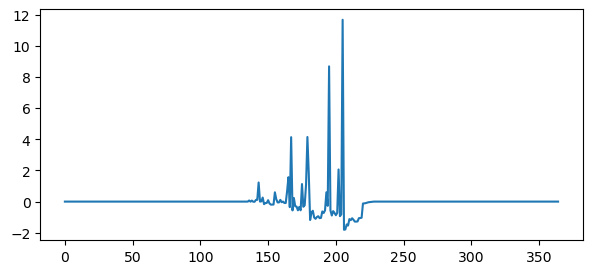

In [396]:
fig7, ax7 = plt.subplots(figsize = (7, 3))

w = 15
ts = list(USERS_TIMESSERIES_LIST[6296742])


ax7.plot(ts)
plt.show();

In [397]:
import numpy as np
df = pd.DataFrame()
df['user_id'] = list(USERS_TIMESSERIES_LIST.keys())
df['dim_0'] = np.array(USERS_TIMESSERIES_LIST.values())
df = pd.merge(df, users, on = 'user_id')
df = df.drop(columns='user_id')
df

,dim_0,bot
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...
6575,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
6576,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
6577,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
6578,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


### Try Clustering

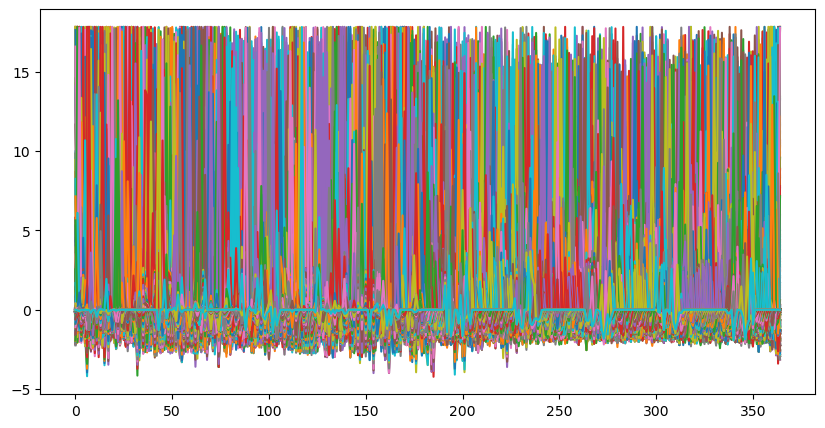

In [398]:
my_df = df.copy()
y = my_df.pop('bot')
X = np.stack(my_df.dim_0)
fig8, ax8 = plt.subplots(figsize = (10, 5))
ax8.plot(X.reshape(X.shape[1], X.shape[0]))
# ax8.set_yscale('symlog')
plt.show();

In [399]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=7, metric="euclidean", max_iter=10, random_state=0)
km.fit(X)

TimeSeriesKMeans(max_iter=10, n_clusters=7, random_state=0)

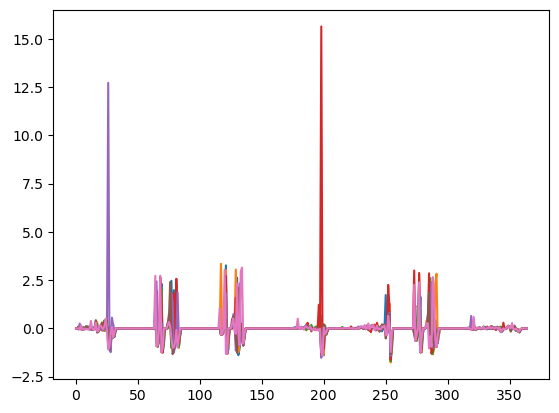

In [400]:
plt.plot(km.cluster_centers_.reshape(X.shape[1], 7))
plt.show();

In [401]:
km.inertia_

223.5431125534239

<AxesSubplot: title={'center': 'BarPlot, kmeans euclidean'}, xlabel='row_0'>

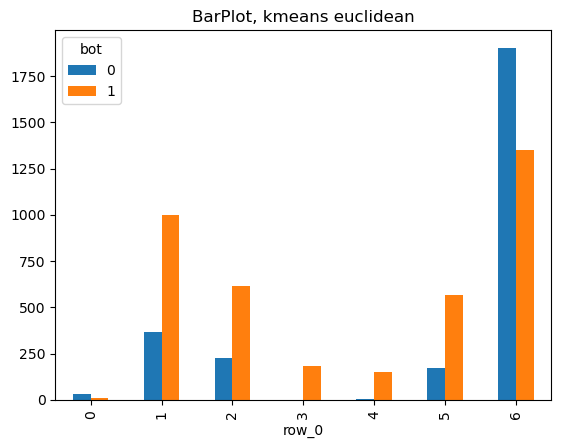

In [402]:
bot_xt_pcte = pd.crosstab(km.labels_, y)
bot_xt_pcte.plot(kind='bar', stacked=False, title='BarPlot, kmeans euclidean')

### Try classifying


In [403]:
from sklearn.model_selection import train_test_split
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
from tslearn.preprocessing import TimeSeriesScalerMinMax
import numpy as np
my_df = df.copy()

y = my_df.pop('bot')
X = np.stack(my_df.dim_0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

In [404]:
n_ts, ts_sz = X.shape
n_classes = len(set(y))

shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.01,
                                                       r=4)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 6580
ts_sz 365
n_classes 2
shapelet_sizes {3: 6, 6: 6, 9: 6, 12: 6}


In [405]:
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="adam",
                        weight_regularizer=0.01,
                        max_iter=200, verbose=1, batch_size=256)

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.9/site-packages/tslearn/shapelets/shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


In [406]:
shp_clf.fit(X_train, y_train)

Epoch 1/200
18/18 [==============================] - 2s 11ms/step - loss: 5.2719 - binary_accuracy: 0.4025 - binary_crossentropy: 5.2509
Epoch 2/200
18/18 [==============================] - 0s 10ms/step - loss: 4.5610 - binary_accuracy: 0.3986 - binary_crossentropy: 4.5407
Epoch 3/200
18/18 [==============================] - 0s 9ms/step - loss: 3.8891 - binary_accuracy: 0.3914 - binary_crossentropy: 3.8695
Epoch 4/200
18/18 [==============================] - 0s 11ms/step - loss: 3.2445 - binary_accuracy: 0.3830 - binary_crossentropy: 3.2253
Epoch 5/200
18/18 [==============================] - 0s 10ms/step - loss: 2.6617 - binary_accuracy: 0.3810 - binary_crossentropy: 2.6428
Epoch 6/200
18/18 [==============================] - 0s 10ms/step - loss: 2.1399 - binary_accuracy: 0.3823 - binary_crossentropy: 2.1210
Epoch 7/200
18/18 [==============================] - 0s 10ms/step - loss: 1.7170 - binary_accuracy: 0.3841 - binary_crossentropy: 1.6981
Epoch 8/200
18/18 [=======================

LearningShapelets(max_iter=200, n_shapelets_per_size={3: 6, 6: 6, 9: 6, 12: 6},
                  optimizer='adam', verbose=1, weight_regularizer=0.01)

In [407]:
from sklearn.metrics import classification_report
predicted_labels = shp_clf.predict(X_test)
print(classification_report(y_test, 
                            predicted_labels, 
                            target_names=['Not Bot', 'Bot']))

8/8 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

     Not Bot       0.74      0.64      0.69       812
         Bot       0.77      0.84      0.80      1162

    accuracy                           0.76      1974
   macro avg       0.75      0.74      0.75      1974
weighted avg       0.76      0.76      0.76      1974



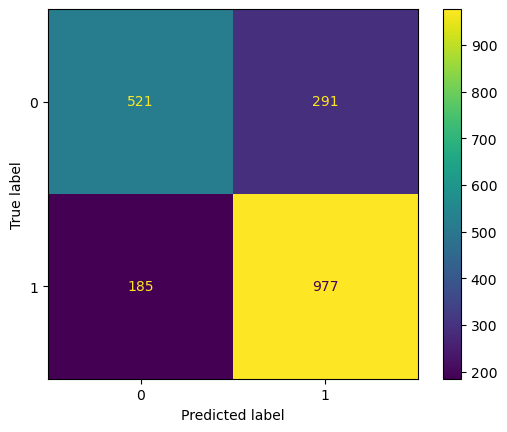

In [408]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Just a bit of try with Rocket and Catch22

### Rocket

In [409]:
from sktime.classification.feature_based import Catch22Classifier
from sktime.classification.kernel_based import RocketClassifier

rocket = RocketClassifier(num_kernels=250)
rocket.fit(X_train, y_train)
predicted_labels_Rocket = rocket.predict(X_test)

RocketClassifier(num_kernels=250)

In [410]:
print(classification_report(y_test, 
                            predicted_labels_Rocket, 
                            target_names=['Not Bot', 'Bot']))

              precision    recall  f1-score   support

     Not Bot       0.89      0.71      0.79       812
         Bot       0.82      0.94      0.88      1162

    accuracy                           0.85      1974
   macro avg       0.86      0.82      0.83      1974
weighted avg       0.85      0.85      0.84      1974



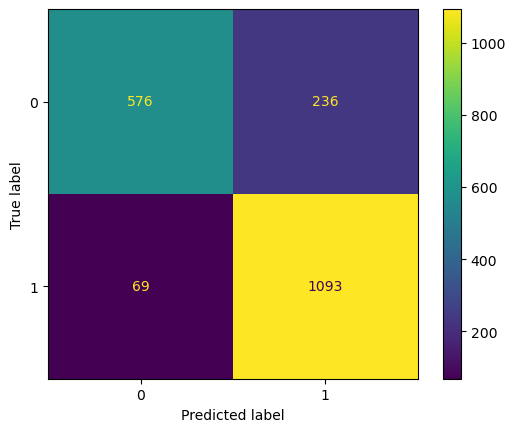

In [411]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted_labels_Rocket)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

### Catch22

In [412]:
catch22 = Catch22Classifier(n_jobs=-1)
catch22.fit(X_train, y_train)
predicted_labels_catch22 = catch22.predict(X_test)

Catch22Classifier(n_jobs=-1)

In [413]:
print(classification_report(y_test, 
                            predicted_labels_catch22, 
                            target_names=['Not Bot', 'Bot']))

              precision    recall  f1-score   support

     Not Bot       0.93      0.70      0.80       812
         Bot       0.82      0.96      0.89      1162

    accuracy                           0.85      1974
   macro avg       0.87      0.83      0.84      1974
weighted avg       0.86      0.85      0.85      1974



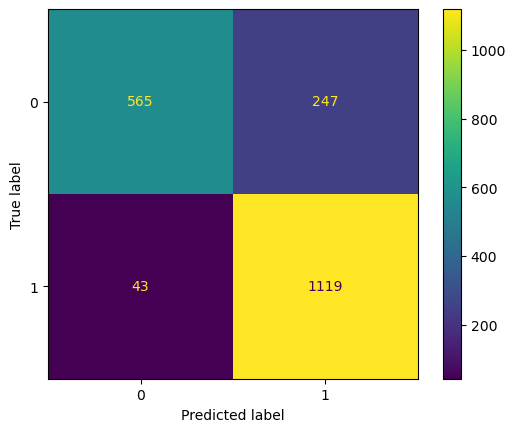

In [414]:
cm = confusion_matrix(y_test, predicted_labels_catch22)
disp = ConfusionMatrixDisplay(cm)
disp.plot()